<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span><ul class="toc-item"><li><span><a href="#NNI" data-toc-modified-id="NNI-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>NNI</a></span><ul class="toc-item"><li><span><a href="#Detect-events" data-toc-modified-id="Detect-events-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Detect events</a></span></li></ul></li><li><span><a href="#Leeuwin-Current" data-toc-modified-id="Leeuwin-Current-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Leeuwin Current</a></span></li><li><span><a href="#Wind-and-heat-flux-from-JRA55-Reanalysis" data-toc-modified-id="Wind-and-heat-flux-from-JRA55-Reanalysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Wind and heat flux from JRA55 Reanalysis</a></span></li></ul></li><li><span><a href="#Case-study-2011:" data-toc-modified-id="Case-study-2011:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Case study 2011:</a></span><ul class="toc-item"><li><span><a href="#Figure-9:-monthly-profiles" data-toc-modified-id="Figure-9:-monthly-profiles-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Figure 9: monthly profiles</a></span></li><li><span><a href="#Figure-8:-Mean-spatial-patterns---depth" data-toc-modified-id="Figure-8:-Mean-spatial-patterns---depth-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Figure 8: Mean spatial patterns - depth</a></span></li><li><span><a href="#Figure-10:-Monthly-evolution-spatial-pattern" data-toc-modified-id="Figure-10:-Monthly-evolution-spatial-pattern-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Figure 10: Monthly evolution spatial pattern</a></span></li></ul></li></ul></div>

In [1]:
#%matplotlib widget 
%matplotlib inline

import sys
sys.path.append("../")  # adds upper level to working directory
# somehow the other way does not work
from utils.orca_utilities import orca_index,deseason_month,anomaly,mean_LC_width,load_orca_EIO
from utils.mhw_detection import detect_events
from utils.plot_utils import finished_plot

import matplotlib.pyplot as plt
import cmocean as cmo
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
import calendar
# import gsw
import string
import matplotlib.dates as mdates

################################
# path to save plots
plotsave = './plots/'

# Load data

## NNI

In [ ]:
# full model data (EIO)
#  load run by run and delete old file, as it seems as if influences speed

[k003ts,k003u,k003v] = load_orca_EIO('K003.hindcast')
# [k004ts,k004u,k004v] = load_orca_EIO('K004.thermhal90')
# [k005ts,k005u,k005v] = load_orca_EIO('K005.wind90')

In [2]:
# load saved data sets of NNI

# anomalies
k003 = xr.open_dataset('../data/NNI_K003_22S_32S_110E_117W.nc')
k004 = xr.open_dataset('../data/NNI_K004_22S_32S_110E_117W.nc')
k005 = xr.open_dataset('../data/NNI_K005_22S_32S_110E_117W.nc')

# full 
# k003f = xr.open_dataset('../../data/NNI_noanom_K003_22S_32S_110E_117W.nc')
# k004f = xr.open_dataset('../../data/NNI_noanom_K004_22S_32S_110E_117W.nc')
# k005f = xr.open_dataset('../../data/NNI_noanom_K005_22S_32S_110E_117W.nc')

In [ ]:
# derive NNI index (above loaded datasets)
# lon_bnds,lat_bnds = [110,117],[-32,-22]
# var = 'temp'
# k003 = orca_index('K003.hindcast',var,lon_bnds,lat_bnds,rm_scycle=False)['votemper'].to_dataset()
# k004 = orca_index('K004.thermhal90',var,lon_bnds,lat_bnds,rm_scycle=False)['votemper'].to_dataset()
# k005 = orca_index('K005.wind90',var,lon_bnds,lat_bnds,rm_scycle=False)['votemper'].to_dataset()
# var = 'sal'
# k003['vosaline'] = orca_index('K003.hindcast',var,lon_bnds,lat_bnds,rm_scycle=False)['vosaline']
# k004['vosaline'] = orca_index('K004.thermhal90',var,lon_bnds,lat_bnds,rm_scycle=False)['vosaline']
# k005['vosaline'] = orca_index('K005.wind90',var,lon_bnds,lat_bnds,rm_scycle=False)['vosaline']
# var = 'MLD'
# k003['somxl010'] = orca_index('K003.hindcast',var,lon_bnds,lat_bnds,rm_scycle=False)['somxl010']
# k004['somxl010'] = orca_index('K004.thermhal90',var,lon_bnds,lat_bnds,rm_scycle=False)['somxl010']
# k005['somxl010'] = orca_index('K005.wind90',var,lon_bnds,lat_bnds,rm_scycle=False)['somxl010']
# var = 'V'
# k003['vomecrty'] = orca_index('K003.hindcast',var,lon_bnds,lat_bnds,rm_scycle=False)['vomecrty']
# k004['vomecrty'] = orca_index('K004.thermhal90',var,lon_bnds,lat_bnds,rm_scycle=False)['vomecrty']
# k005['vomecrty'] = orca_index('K005.wind90',var,lon_bnds,lat_bnds,rm_scycle=False)['vomecrty']
# var = 'U'
# k003['vozocrtx'] = orca_index('K003.hindcast',var,lon_bnds,lat_bnds,rm_scycle=False)['vozocrtx']
# k004['vozocrtx'] = orca_index('K004.thermhal90',var,lon_bnds,lat_bnds,rm_scycle=False)['vozocrtx']
# k005['vozocrtx'] = orca_index('K005.wind90',var,lon_bnds,lat_bnds,rm_scycle=False)['vozocrtx']

# k003.to_netcdf('../NNI_noanom_K003_22S_32S_110E_117W.nc')
# k004.to_netcdf('../NNI_noanom_K004_22S_32S_110E_117W.nc')
# k005.to_netcdf('../NNI_noanom_K005_22S_32S_110E_117W.nc')

### Detect events

In [3]:
###########################
# seasonal,monthly threshold

# define threshold
pval = 10
bool_mhw,bool_mcw = detect_events(k003,pval,0,'monthly')

calculate monthly threshold


## Leeuwin Current

In [ ]:
# apply LC mask, average between 22-32 south to match NNI box

def mask_LC(ds1,ds2):
    # vvel
    [vLC,LCw,LCe] = mean_LC_width(ds1['vomecrty'])
    # temp
    [tLC,LCw,LCe] = mean_LC_width(ds2['votemper'])
    # sal
    [sLC,LCw,LCe] = mean_LC_width(ds2['vosaline'])
    # vel has different grid, need to adjust 
    vLC['lat'] = sLC.lat.values  # this is not correct! XORCA should fix the grid issues
    LC = sLC.to_dataset()
    LC['votemper'] = tLC
    LC['vomecrty'] = vLC
    return LC

# call function
# LC_k003 = mask_LC(k003v,k003ts)
# LC_k004 = mask_LC(k004v,k004ts)
# LC_k005 = mask_LC(k005v,k005ts)

# save to netcdf
# LC_k003.to_netcdf('../data/LC_k003.nc')
# LC_k004.to_netcdf('../data/LC_k004.nc')
# LC_k005.to_netcdf('../data/LC_k005.nc')

# load saved sata
LC_k003 = xr.open_dataset('../../data/LC_k003.nc')
LC_k004 = xr.open_dataset('../../data/LC_k004.nc')
LC_k005 = xr.open_dataset('../../data/LC_k005.nc')

## Wind and heat flux from JRA55 Reanalysis
 
Data used here is the REANALYSIS!!! Downloaded from:
https://rda.ucar.edu/datasets/ds628.0/index.html#!description

This seems to take very long to run (~12min) - not sure why...Fields are saved as netcdf so don't need to run this all the time

In [4]:
# 

# # meridional wind
# jrav = xr.open_dataset('/vortex/clidex/data/forcing/JRA55/data/anl_surf125.034_vgrid_19580101_20190630.nc')
# jrav = np.squeeze(jrav['var34'])

# # latent heat flux
# lhflx = xr.open_dataset('/vortex/clidex/data/forcing/JRA55/data/fcst_phy2m125.121_lhtfl_19580101_20190630.nc')

# # create ocean and land mask
# mask = xr.open_dataset('/vortex/clidex/data/forcing/JRA55/land_mask_ll125_jra55.nc')
# mask = np.squeeze(mask['LAND_GDS0_SFC'][0,:,:])
# mask = mask.rename({'g0_lat_1':'lat','g0_lon_2':'lon'})
# oceanmask = mask.copy(deep=True)
# oceanmask = oceanmask.where(oceanmask==0).values
# oceanmask[oceanmask==0] = 1

# # apply mask

# # meridional wind
# vwind = jrav*oceanmask
# vwind_nni = vwind.sel(lon=slice(110,117),lat=slice(-22,-32)).mean(['lon','lat'])
# vwind_nni_deseas = vwind_nni.groupby('time.dayofyear') - vwind_nni.groupby('time.dayofyear').mean('time')

# # latent heat flux
# lhflx1 = np.squeeze(lhflx.rename({'g0_lat_2':'lat','g0_lon_3':'lon'})['LHTFL_GDS0_SFC_ave3h'][:,0,:,:])*oceanmask
# lhflx_nni = lhflx1.sel(lon=slice(110,117),lat=slice(-22,-32)).mean(['lon','lat'])
# lhflx_nni_deseas = lhflx_nni.groupby('initial_time0_hours.dayofyear') - lhflx_nni.groupby('initial_time0_hours.dayofyear').mean('initial_time0_hours')

# vwind_clim = vwind_nni.groupby('time.dayofyear').mean('time')
# lhflx_clim = lhflx_nni.groupby('initial_time0_hours.dayofyear').mean('initial_time0_hours')

# import pandas as pd
# time = pd.date_range('2010-01-01','2011-12-31',freq='1d')



# save variables to netcdf

# wind
# vwind_nni = vwind_nni.to_dataset()
# vwind_nni["vwind"] = vwind_nni['var34']
# vwind_nni.drop('var34')
# vwind_nni["vwind_dseas"] = vwind_nni_deseas
# vwind_nni.attrs['history'] = ('loaded from /vortex/clidex/data/forcing/JRA55/data/anl_surf125.034_vgrid_19580101_20190630.nc, ' +
#                               'variable var34 used, averaged over NNI box 110-117E, 22-32S')
# vwind_nni.to_netcdf('../data/JRA55_vwind_nni.nc')

# lhflx
# lhflx_nni = lhflx_nni.to_dataset()
# lhflx_nni["lhflx"] = lhflx_nni['LHTFL_GDS0_SFC_ave3h']
# lhflx_nni.drop('LHTFL_GDS0_SFC_ave3h')
# lhflx_nni["lhflx_dseas"] = lhflx_nni_deseas
# lhflx_nni.attrs['history'] = ('loaded from /vortex/clidex/data/forcing/JRA55/data/fcst_phy2m125.121_lhtfl_19580101_20190630.nc, ' +
#                               'variable LHTFL_GDS0_SFC_ave3h used, averaged over NNI box 110-117E, 22-32S')
# lhflx_nni.to_netcdf('../data/JRA55_lhflx_nni.nc')

lhflx_nni = xr.open_dataset('../data/JRA55_lhflx_nni.nc')
vwind_nni = xr.open_dataset('../data/JRA55_vwind_nni.nc')

# Case study 2011:

Event detected from October 2010 - June 2011

In [5]:
# NNI index
k003_2011 = (k003*bool_mhw).sel(time_counter=slice('2010-10-01','2011-07-01'))
k004_2011 = (k004*bool_mhw).sel(time_counter=slice('2010-10-01','2011-07-01'))
k005_2011 = (k005*bool_mhw).sel(time_counter=slice('2010-10-01','2011-07-01'))

 ## Figure 9: monthly profiles

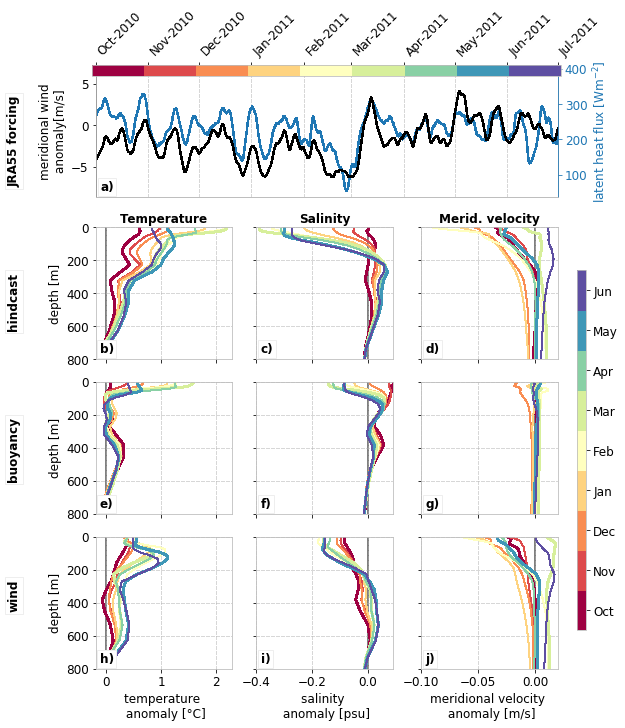

In [6]:
########################
# plotting function
# plot individual events depth profile
from matplotlib.colors import LinearSegmentedColormap

def plot_prof_event(ds,var,ax):
    cols = plt.get_cmap('Spectral',len(ds.time_counter))
    # Remove the middle 40% of the RdBu_r colormap
#     interval = np.hstack([np.linspace(0, 0.4,4), np.linspace(0.6, 1,5)])
#     cols = plt.get_cmap('Spectral',interval)
#     cols = LinearSegmentedColormap.from_list('name', colors)
    if var=='vomecrty': depth='depthv'
    else: depth = 'deptht'
    # Make dummie mappable
    c = np.arange(1, len(ds.time_counter))
    dummie_cax = ax.scatter(c, c, c=c, cmap=cols,vmin=0.5,vmax=len(ds.time_counter)+0.5)
    # Clear axis
    ax.cla()
    for i in range(len(ds.time_counter)):
        ds[var][i,:].plot(ax=ax,yincrease=False,y=depth,color=cols(i),linewidth=1)
    ax.axvline(0,color='gray',linewidth=1.5,zorder=0)
    ax.set_title('')
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_ylim(800,0)
    return dummie_cax
        #plt.xlim(-0.5,2.2)
#         plt.savefig(plotsave + 'events/NNI_mhw_k005_' + np.str(test.time_counter[0].dt.year.values) +
#                     '_' + np.str(test.time_counter[0].dt.month.values) +'.png',dpi=300,bbox_inches='tight')



############## Plot ############
plt.close('all')
fig = plt.figure(figsize=(8,10),constrained_layout=True)
fs = 12
plt.rcParams.update({'font.size':fs})
cols = plt.get_cmap('tab10')

# define sizes of subplots
widths = [1,1,1]
heights = [1,1,1,1]
grid = fig.add_gridspec(ncols=3, nrows=4, width_ratios=widths,
                          height_ratios=heights)

##########
# forcing
############

# wind
ax1 = fig.add_subplot(grid[0, 0:3])
(vwind_nni['vwind_dseas']).rolling(time=30).mean().plot(ax=ax1,label='wind',linewidth=1.5)
plt.xlim('2010-10-01','2011-07-01')
# ax1.set_ylim(-8,8)
ax1.set_ylabel('meridional wind\n anomaly[m/s] ')
ax1.spines['left'].set_color('k')
ax1.tick_params(axis='y', colors='k')

# ax1.axhline(0,color='k')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
ax1.xaxis.tick_top() 
ax1.xaxis.set_label_position('top') 
t = ax1.text(0.01, 0.05, string.ascii_lowercase[0]+')', transform=ax1.transAxes, 
                size=fs, weight='bold')
t.set_bbox(dict(facecolor='w',boxstyle='square,pad=0.2'))

# lhflx
ax1_2 = ax1.twinx()
lhflx_nni['lhflx'].rolling(initial_time0_hours=30).mean().plot(ax=ax1_2,color='k',label='lhflx',linewidth=1.5)
# ax2.set_ylim(-160,160)
# ax2.axhline(0)
ax1_2.spines['right'].set_color(cols(0))
ax1_2.tick_params(axis='y', colors=cols(0))
ax1_2.set_ylabel('latent heat flux [Wm$^{-2}$]',color=cols(0))
ax1_2.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))


for ax in [ax1,ax1_2]:
    ax.set_title('')
    ax.set_xlabel('')
    ax.yaxis.grid() # vertical lines

for label in ax1.get_xticklabels():
    label.set_ha("left")
    label.set_rotation(45)
    
############
# Vertical profiles
############
ax2=[]
cax=[]
ll=1
for ds,run,row in zip([k003_2011,k004_2011,k005_2011],['k003','k004','k005'],np.arange(1,4)):
    for var,i in zip(['votemper','vosaline','vomecrty'],range(3)):
            ax2.append(fig.add_subplot(grid[row, i]))
            cax.append(plot_prof_event(ds,var,ax2[-1]))
            if i>0: ax2[-1].set_yticklabels('')
            if (row>0 and row<3): ax2[-1].set_xticklabels('')
            lines = ax2[-1].get_lines()
            for i in [0,5,7]: plt.setp(lines[i], linewidth=2)
            t = ax2[-1].text(0.03, 0.05, string.ascii_lowercase[ll]+')', transform=ax2[-1].transAxes, 
                size=fs, weight='bold')
            t.set_bbox(dict(facecolor='w',boxstyle='square,pad=0.2'))
            ll=ll+1
            

for i in [0,3,6]:
    ax2[i].set_xlim(-0.2,2.3)
    ax2[i+1].set_xlim(-0.4,0.09)
    ax2[i+2].set_xlim(-0.1,0.02)
    ax2[i].set_ylabel('depth [m]')
    
ax2[6].set_xlabel('temperature \n anomaly [\N{DEGREE SIGN}C]',fontsize=fs)
ax2[7].set_xlabel('salinity \n anomaly [psu]',fontsize=fs)
ax2[8].set_xlabel('meridional velocity \n anomaly [m/s]',fontsize=fs);

ax2[0].set_title('Temperature',weight='bold')
ax2[1].set_title('Salinity',weight='bold')
ax2[2].set_title('Merid. velocity',weight='bold')

# colorbar
cbaxes = fig.add_axes([0.94, 0.13, 0.015, 0.5])
cb = plt.colorbar(cax[0], cax=cbaxes, orientation='vertical',ticks=np.arange(1,10))
cb.ax.set_yticklabels(['Oct', 'Nov','Dec','Jan','Feb','Mar','Apr','May','Jun']);
cbaxes1 = fig.add_axes([0.098, 0.9, 0.814, 0.015])
cb1 = plt.colorbar(cax[1], cax=cbaxes1, orientation='horizontal',ticks=np.arange(1,10))
cb1.ax.set_xticklabels('');
cb1.set_ticks([])

# row labels
t = plt.text(-0.05, 0.75, 'JRA55 forcing', transform=plt.gcf().transFigure,
                size=12, weight='bold',zorder=10,rotation=90)
t.set_bbox(dict(facecolor='w',boxstyle='square,pad=0.2'))
t = plt.text(-0.05, 0.55, 'hindcast', transform=plt.gcf().transFigure,
                size=12, weight='bold',zorder=10,rotation=90)
t.set_bbox(dict(facecolor='w',boxstyle='square,pad=0.2'))
t = plt.text(-0.05, 0.34, 'buoyancy', transform=plt.gcf().transFigure,
                size=12, weight='bold',zorder=10,rotation=90)
t.set_bbox(dict(facecolor='w',boxstyle='square,pad=0.2'))
t = plt.text(-0.05, 0.16, 'wind', transform=plt.gcf().transFigure,
                size=12, weight='bold',zorder=10,rotation=90)
t.set_bbox(dict(facecolor='w',boxstyle='square,pad=0.2'))

# finished_plot(fig,plotsave + 'fig_monthprof_mhw2010.png')

## Figure 8: Mean spatial patterns - depth

In [11]:
# plotting functions
plt.rcParams.update({'font.size':13})

# add velocity vectors to map
def plot_vel(run,axp,opt='mhw',depth=0):
    incx,incy = 7,7
    var = 'vomecrty'
    
    if opt=='mhw':
        if run=='k003': ds=k003f_comp_mhw
        elif run=='k004': ds=k004f_comp_mhw
        elif run=='k005': ds=k005f_comp_mhw
    elif opt=='mcw':
        if run=='k003': ds=k003f_comp_mcw
        elif run=='k004': ds=k004f_comp_mcw
        elif run=='k005': ds=k005f_comp_mcw
    
    dsu = ds['vozocrtx']
    dsu = dsu.where(dsu!=0)
    dsv = ds['vomecrty']
    dsv.where(dsv!=0)
    lonm,latm = np.meshgrid(ds['vozocrtx'].lon[np.arange(0,np.size(dsu,2)-1,incx)],
                            ds['vomecrty'].lat[np.arange(0,np.size(dsu,1)-1,incy)])
    
    axp.quiver(lonm,latm,
               dsu[depth,np.arange(0,np.size(dsu,1)-1,incy),np.arange(0,np.size(dsu,2)-1,incx)],
               dsv[depth,np.arange(0,np.size(dsu,1)-1,incy),np.arange(0,np.size(dsu,2)-1,incx)],
              scale=2,linewidths=2)
    
# plot time mean at different depth levels    
def subplot_composite_anomaly(temp,sal,event='mhw',ext='full',var='votemper',run='k003',addvel=0):
    
    if ext=='zoom':
        # which extent
        extent = (90,130,-40,0)   # large: (75,140,-45,30), zoom: (90,130,-40,0)
    elif ext=='full':
        extent = [90,150,-37,10] # (75,140,-45,30)
        
               
    # plotting
    fs = 12
    proj = ccrs.PlateCarree()
    plt.rcParams.update({'font.size':fs})
    fig,ax = plt.subplots(nrows=2,ncols=4,figsize=(13,7),subplot_kw=dict(projection=proj),sharex=True)
    plt.subplots_adjust(wspace=0.02,left=0.02,right=0.94)

    # temperature
    vmin,vmax = -3,3
    for i,depthlev in zip(range(4),[0,7,10,13]):
            hh = temp.where(temp!=0)[depthlev,:,:].plot(ax=ax[0,i],vmin=vmin,vmax=vmax,add_colorbar=False,
                                                             cmap=plt.get_cmap('cmo.balance'))
            ax[0,i].set_extent(extent,crs=proj)
            ax[0,i].set_title('')
            tt = ax[0,i].text(0.6,0.2,'depth: ' + np.str(np.round(temp.deptht[depthlev].values))+'m',
                         transform=ax[0,i].transAxes,size=fs-1)
            tt.set_bbox(dict(facecolor='w',boxstyle='square,pad=0.2'))
            ax[0,i].add_feature(cartopy.feature.LAND, color='lightgray')
            gl = ax[0,i].gridlines(crs=proj, draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--',
                                  xlocs=range(60,180,20),ylocs=range(-60,45,15))
            gl.ylabels_right = False
            gl.xlabels_top = False
            ax[0,i].coastlines(resolution='50m')
            # mark NNI rectangle
            ax[0,i].add_patch(mpatches.Rectangle(xy=[110, -32], width=7, height=10,
                                                facecolor='none',edgecolor='k',linewidth=2,
                                                transform=proj))
            # add velocity field
            if addvel==1: plot_vel(run,ax[0,i],event,depthlev)
            
            # take care of labels
            if i==0:
               gl.yformatter = LATITUDE_FORMATTER
#                gl.ylabel_style = {'size':14}
            else: gl.ylabels_left = False
            gl.xformatter = LONGITUDE_FORMATTER
#             gl.xlabel_style = {'size':14}
            
            # add colorbar
            cbaxes = fig.add_axes([0.95, 0.56, 0.015, 0.3])
            cb = plt.colorbar(hh, cax=cbaxes, orientation='vertical',label='temperature anomaly [\N{DEGREE SIGN}C]')
#             cb.ax.tick_params(labelsize=13)


    # salinity
    vmin, vmax = -0.7,0.7
    for i,depthlev in zip(range(4),[0,7,10,13]):
            hh = sal.where(temp!=0)[depthlev,:,:].plot(ax=ax[1,i],vmin=vmin,vmax=vmax,add_colorbar=False,
                                                             cmap=plt.get_cmap('cmo.balance'))
            ax[1,i].set_extent(extent,crs=proj)
            ax[1,i].set_title('')
            tt = ax[1,i].text(0.6,0.2,'depth: ' + np.str(np.round(temp.deptht[depthlev].values))+'m',
                         transform=ax[1,i].transAxes,size=fs-1)
            tt.set_bbox(dict(facecolor='w',boxstyle='square,pad=0.2'))
            ax[1,i].add_feature(cartopy.feature.LAND, color='lightgray')
            gl = ax[1,i].gridlines(crs=proj, draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--',
                                  xlocs=range(60,180,20),ylocs=range(-60,45,15))
            gl.ylabels_right = False
            gl.xlabels_top = False
            ax[1,i].coastlines(resolution='50m')
            # mark NNI rectangle
            ax[1,i].add_patch(mpatches.Rectangle(xy=[110, -32], width=7, height=10,
                                                facecolor='none',edgecolor='k',linewidth=2,
                                                transform=proj))
            # add velocity field
            if addvel==1: plot_vel(run,ax[1,i],event,depthlev)
            
            # take care of labels
            if i==0:
                gl.yformatter = LATITUDE_FORMATTER
                gl.ylabel_style = {'size':fs+1}
            else: gl.ylabels_left = False
            gl.xformatter = LONGITUDE_FORMATTER
            gl.xlabel_style = {'size':fs+1}
            
            # add colorbar
            cbaxes = fig.add_axes([0.95, 0.15, 0.015, 0.3])
            cb = plt.colorbar(hh, cax=cbaxes, orientation='vertical',label='salinity anomaly [psu]')
#             cb.ax.tick_params(labelsize=13)
            
            
#     # save figure
#     if anomaly==1:
#         plt.savefig(plotsave + event + '_tempa_sala_' + run + '_2010_latlon_composite_depthlevels_' +
#                     ext + '.png',dpi=300,bbox_inches='tight')
#     else:
#         plt.savefig(plotsave + event + '_temp_sal_'  + run + '_2010_latlon_composite_depthlevels_' +
#            ext + '.png',dpi=300,bbox_inches='tight')
#     plt.close('all')

In [9]:
# Derive anomalies for spatial composite
# I am only loading individual runs and am deleting old variables as otherwise the 
# memory seems to become a problem and everything is aweful slow.

# temp & salinity
# k003tsa = (k003ts.groupby('time_counter.month')-k003ts.groupby('time_counter.month').mean('time_counter'))
# k004tsa = (k004ts.groupby('time_counter.month')-k004ts.groupby('time_counter.month').mean('time_counter'))
# k005tsa = (k005ts.groupby('time_counter.month')-k005ts.groupby('time_counter.month').mean('time_counter'))

# velocity
# k003va = (k003v.groupby('time_counter.month')-k003v.groupby('time_counter.month').mean('time_counter'))
# k003ua = (k003u.groupby('time_counter.month')-k003u.groupby('time_counter.month').mean('time_counter'))

# select time of event and save to netcdf 
# k003tsa.sel(time_counter=slice('2010-09-01','2011-09-01')).to_netcdf('../data/k003tsa2010.nc')
# k003tsa.sel(time_counter=slice('2010-06-01','2012-09-01')).to_netcdf('../../data/k003tsa2010_2012.nc')

# load saved dataset
k003tsa2010 = xr.open_dataset('../data/k003tsa2010.nc')
# k004tsa2010 = xr.open_dataset('../../data/k004tsa2010.nc')
# k005tsa2010 = xr.open_dataset('../../data/k005tsa2010.nc')

# derive mean over event
k003tsa2010mean = k003tsa2010.sel(time_counter=slice('2010-10-01','2011-08-01')).mean('time_counter')
# k004tsa2010mean = k004tsa2010.sel(time_counter=slice('2010-10-01','2011-08-01')).mean('time_counter')
# k005tsa2010mean = k005tsa2010.sel(time_counter=slice('2010-10-01','2011-08-01')).mean('time_counter')

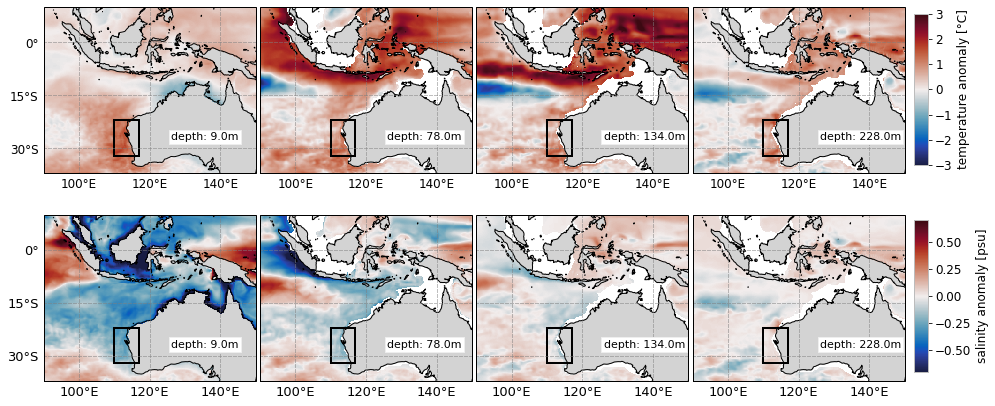

In [12]:
###################
# plotting
###################

#plot time-mean field for specific event
subplot_composite_anomaly(k003tsa2010mean['votemper'],k003tsa2010mean['vosaline'],'mhw','full','votemper',run='k003',addvel=0)# zoom option as well

## Figure 10: Monthly evolution spatial pattern

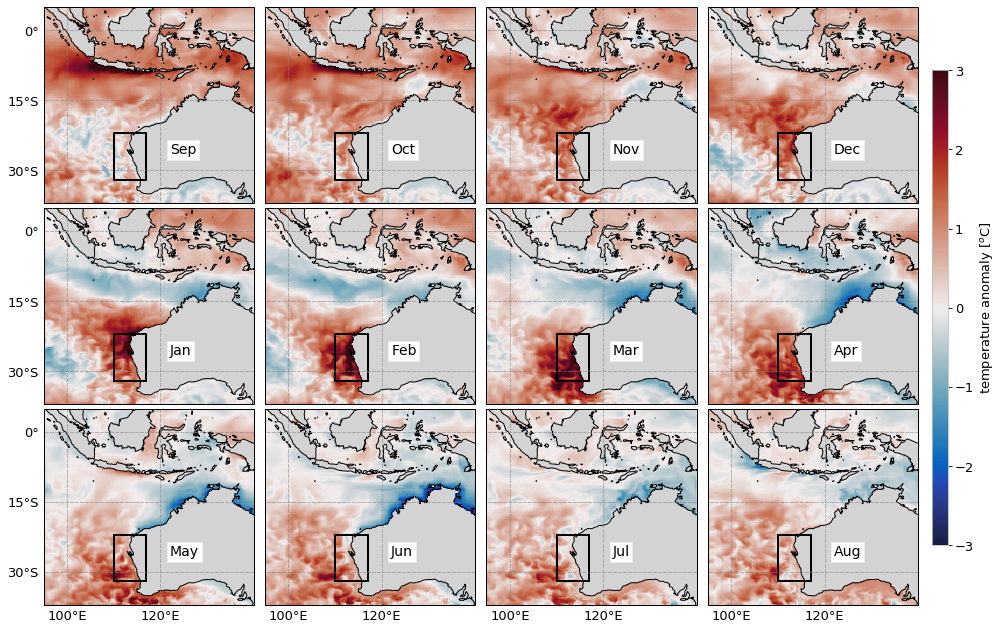

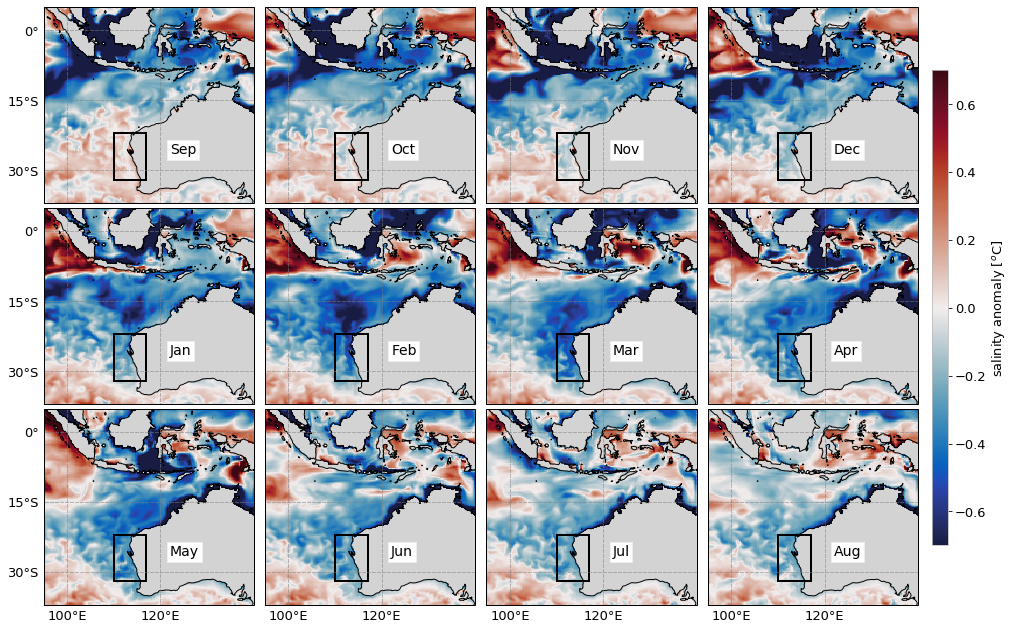

In [13]:
# plot time evolution at specific depth level
def subplot_composite_anomaly_month(temp,event='mhw',ext='full',var='votemper',run='k003',addvel=0,depthlev=0):
    
    if ext=='zoom':
        # which extent
        extent = (90,130,-40,0)   # large: (75,140,-45,30), zoom: (90,130,-40,0)
    elif ext=='full':
        extent = [95,140,-37,5] # (75,140,-45,30)
        
    # cold or warm events
    if var=='votemper': vmin,vmax = -3,3
    elif var=='vosaline': vmin, vmax = -0.7,0.7
               
    # plotting
    proj = ccrs.PlateCarree()
    fig,ax = plt.subplots(ncols=4,nrows=3,figsize=(15,11),subplot_kw=dict(projection=proj),constrained_layout=True)
    plt.subplots_adjust(wspace=0.025,hspace=0.025,right=0.94)

    month=0
    for i in range(3):
        for j in range(4):
            if month<12:
                hh = temp.where(temp!=0)[month,depthlev,:,:].plot(ax=ax[i,j],vmin=vmin,vmax=vmax,add_colorbar=False,
                                                                 cmap=plt.get_cmap('cmo.balance'))
                ax[i,j].set_extent(extent,crs=proj)
                ax[i,j].set_title('')
                tt = ax[i,j].text(0.6,0.25,calendar.month_abbr[temp['time_counter.month'][month].values],
                             transform=ax[i,j].transAxes,size=14)
                tt.set_bbox(dict(facecolor='w',boxstyle='square,pad=0.2'))
                ax[i,j].add_feature(cartopy.feature.LAND, color='lightgray')
                gl = ax[i,j].gridlines(crs=proj, draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--',
                                      xlocs=range(60,160,20),ylocs=range(-60,45,15))
                gl.ylabels_right = False
                gl.xlabels_top = False
                ax[i,j].coastlines(resolution='50m')
                # mark NNI rectangle
                ax[i,j].add_patch(mpatches.Rectangle(xy=[110, -32], width=7, height=10,
                                                    facecolor='none',edgecolor='k',linewidth=2,
                                                    transform=proj))

                # add velocity field
                if addvel==1: plot_vel(run,ax[i,j],event,depthlev)

               # depthlev=depthlev+1
                month = month+1

                # take care of labels
                if i==2:
                    gl.xformatter = LONGITUDE_FORMATTER
                    gl.xlabel_style = {'size':13}
                else:
                    gl.xlabels_bottom = False
                # xlabels
                if j==0:
                    gl.yformatter = LATITUDE_FORMATTER
                    gl.ylabel_style = {'size':13}
                else:
                    gl.ylabels_left = False
            
    # add colorbar
    cbaxes = fig.add_axes([0.95, 0.2, 0.015, 0.6])
    cb = plt.colorbar(hh, cax=cbaxes, orientation='vertical')
    if var=='votemper':
        cb.set_label(label='temperature anomaly [$^o$C]',fontsize=13)
    elif var=='vosaline':
        cb.set_label(label='salinity anomaly [$^o$C]',fontsize=13)

    cb.ax.tick_params(labelsize=13)
     
#     plt.savefig(plotsave + event + '_' + var + '_' + run + '_2000_latlon_composite_depthlevels_' +
#            np.str(int(temp.deptht[depthlev].values)) + 'm.png',dpi=300,bbox_inches='tight')
#     plt.close('all')



# plot temporal evolution of spatial fields at different depth
for i in [0]:  # ,7,10,13 same depth levels as in spatial composite
    subplot_composite_anomaly_month(k003tsa2010['votemper'],'mhw','full','votemper',run='k003',addvel=0,depthlev=i)# zoom option as well
    subplot_composite_anomaly_month(k003tsa2010['vosaline'],'mhw','full','vosaline',run='k003',addvel=0,depthlev=i)# zoom option as well